In [0]:
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
path = Path('/content/drive/My Drive/ML-DL Data/UCMerced_LandUse')
path.ls()

[PosixPath('/content/drive/My Drive/ML-DL Data/UCMerced_LandUse/Images'),
 PosixPath('/content/drive/My Drive/ML-DL Data/UCMerced_LandUse/readme.txt'),
 PosixPath('/content/drive/My Drive/ML-DL Data/UCMerced_LandUse/readme.txt.bak'),
 PosixPath('/content/drive/My Drive/ML-DL Data/UCMerced_LandUse/Stage-2.pth'),
 PosixPath('/content/drive/My Drive/ML-DL Data/UCMerced_LandUse/Stage-1_big.pth'),
 PosixPath('/content/drive/My Drive/ML-DL Data/UCMerced_LandUse/final_model.pth'),
 PosixPath('/content/drive/My Drive/ML-DL Data/UCMerced_LandUse/Stage-1.pth')]

In [0]:
src = (ImageList.from_folder(path/'Images')
      .split_by_rand_pct(0.2)
      .label_from_folder())

In [0]:
data = (src.transform(get_transforms(flip_vert=True, max_warp=0), size=128)
        .databunch()
        .normalize(imagenet_stats))

In [0]:
metrics = [accuracy, Precision(average='macro'), Recall(average='macro'),
           FBeta(average='macro')]
arch = models.resnet34

In [8]:
learn = cnn_learner(data, arch, metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 67868325.47it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


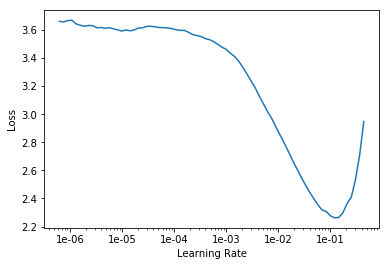

In [0]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(8, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,time
0,3.441441,2.544956,0.277910,0.240168,0.273182,0.258916,05:47
1,2.598990,1.165842,0.695962,0.699604,0.702127,0.691497,00:15
2,1.817913,0.693912,0.821853,0.817808,0.821912,0.817491,00:13
3,1.315866,0.518957,0.871734,0.867945,0.869883,0.868177,00:14
4,0.988763,0.449916,0.883610,0.879761,0.882007,0.879730,00:13
5,0.770685,0.408312,0.890736,0.887370,0.891645,0.888885,00:13
6,0.642444,0.401103,0.888361,0.884316,0.887586,0.885235,00:13
7,0.576833,0.401696,0.893112,0.889043,0.893253,0.890479,00:13


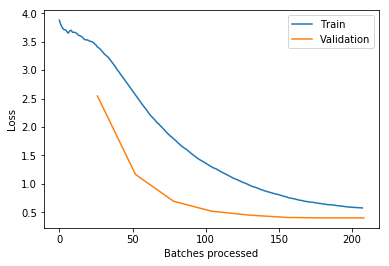

In [10]:
learn.recorder.plot_losses()

In [14]:
learn.fit_one_cycle(2, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,time
0,0.403221,0.336152,0.914489,0.910561,0.916338,0.914160,00:13
1,0.366339,0.337891,0.916865,0.914063,0.918461,0.915934,00:13


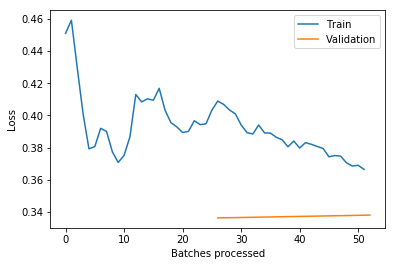

In [15]:
learn.recorder.plot_losses()

In [0]:
learn.save(path/'Stage-1')

Trained the learner for 10+2+2 epochs.


In [0]:
learn.load(path/'Stage-1');

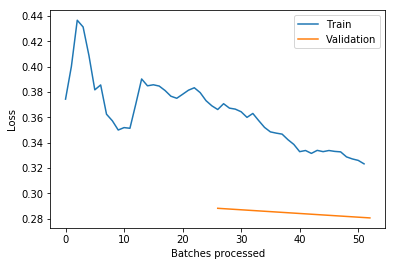

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


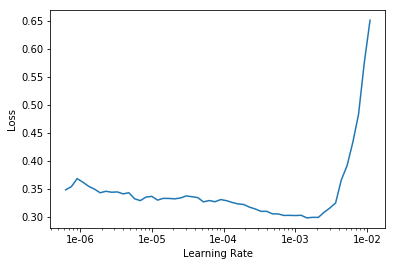

In [18]:
learn.lr_find()
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(8, slice(1e-4, 1e-3/5))

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,time
0,0.324472,0.274140,0.921615,0.916772,0.921021,0.919325,00:14
1,0.263303,0.163320,0.954869,0.955632,0.957065,0.956350,00:14
2,0.205337,0.125493,0.961995,0.962063,0.962665,0.961841,00:14
3,0.158273,0.100395,0.964371,0.965943,0.964616,0.964426,00:14
4,0.121665,0.115002,0.959620,0.960577,0.961589,0.960400,00:14
5,0.094448,0.098569,0.971496,0.971177,0.971667,0.970979,00:14
6,0.075651,0.090429,0.976247,0.976100,0.976157,0.975616,00:14
7,0.061710,0.090468,0.971496,0.971726,0.971383,0.970846,00:14


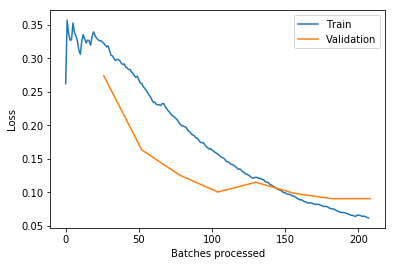

In [20]:
learn.recorder.plot_losses()

In [0]:
learn.save(path/'Stage-2')

In [22]:
learn.fit_one_cycle(2, slice(1e-4, 1e-3/5))

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,time
0,0.040907,0.095173,0.964371,0.967282,0.966459,0.964943,00:14
1,0.052163,0.093888,0.978622,0.980576,0.981400,0.980438,00:14


Since valid_loss increases, we revert back to the previously saved model.

In [0]:
learn.load(path/'Stage-2');

In [0]:
data = (src.transform(get_transforms(flip_vert=True, max_warp=0), size=256)
        .databunch()
        .normalize(imagenet_stats))

Retraining the model with bigger images

In [0]:
learn.data = data

In [0]:
learn.freeze()

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


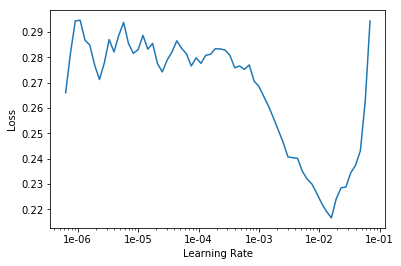

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(8, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,time
0,0.242159,0.237816,0.921615,0.921284,0.922712,0.920657,00:25
1,0.200418,0.170580,0.942993,0.942403,0.944350,0.942686,00:24
2,0.153528,0.136183,0.952494,0.954713,0.951544,0.950536,00:25
3,0.133127,0.116791,0.950119,0.950361,0.951036,0.949774,00:25
4,0.110820,0.106467,0.957245,0.959930,0.956257,0.955502,00:24
5,0.098315,0.110111,0.964371,0.964555,0.964115,0.963579,00:25
6,0.085692,0.101176,0.966746,0.966753,0.967164,0.966428,00:24
7,0.076803,0.102683,0.961995,0.960947,0.962354,0.961435,00:25


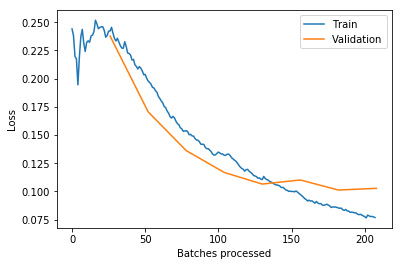

In [30]:
learn.recorder.plot_losses()

In [0]:
learn.save(path/'Stage-1_big')

In [32]:
learn.fit_one_cycle(2, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,time
0,0.051779,0.097733,0.966746,0.965862,0.968401,0.967234,00:24
1,0.058898,0.091890,0.969121,0.968174,0.969517,0.968400,00:24


In [0]:
learn.save(path/'Stage-1_big')

Trained for 10+2 epochs

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


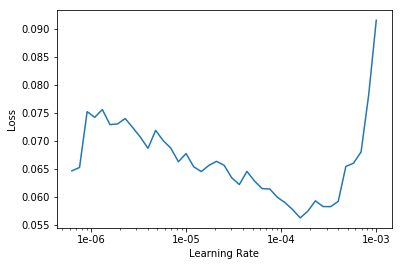

In [35]:
learn.lr_find()
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(8, slice(3e-5, 1e-3/5))

epoch,train_loss,valid_loss,accuracy,precision,recall,f_beta,time
0,0.064843,0.080691,0.966746,0.967200,0.966900,0.966352,00:26
1,0.050430,0.076991,0.966746,0.965024,0.965973,0.964810,00:27
2,0.049513,0.090704,0.961995,0.964789,0.959442,0.959799,00:27
3,0.051997,0.063953,0.978622,0.979609,0.978567,0.978197,00:27
4,0.047963,0.059175,0.983373,0.984192,0.984419,0.984081,00:27
5,0.036781,0.040611,0.988124,0.988633,0.989443,0.988971,00:26
6,0.030237,0.037662,0.992874,0.993042,0.993588,0.993375,00:26
7,0.025453,0.036109,0.990499,0.990397,0.990787,0.990553,00:26


In [0]:
learn.save(path/'final_model')

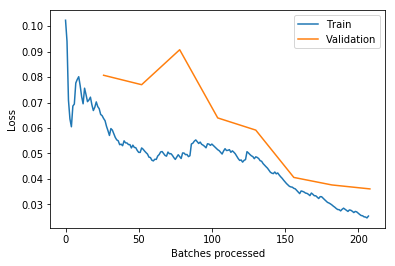

In [38]:
learn.recorder.plot_losses()

In [0]:
learn.load(path/'final_model');